IMPORT MODULES

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import scipy.integrate
import scipy.optimize
import scipy.stats

CONSTANTS

In [15]:
global m_0, c
#H_0 = 75 * 10**3 / (3.086*10**22) # s^-1
m_0 = -20.45
c = 299792458 # m/s

READ DATA

In [16]:
#reads data
name, redshift, distance_modulus, dm_err = functions.read_data('sn_data_extended.txt')

DoF = 174
Optimised parameters =  [0.07073886] 

Covariance matrix = 
 [[1.5765004e-07]]


c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:88: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xval,
c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:93: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xval,


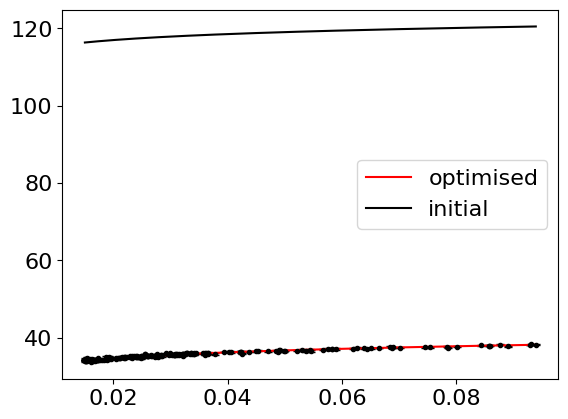

chi^2_min = 171.26729239918515
reduced chi^2 = 0.9842947839033629
$P(chi^2_min, DoF)$ = 0.5443776274627189


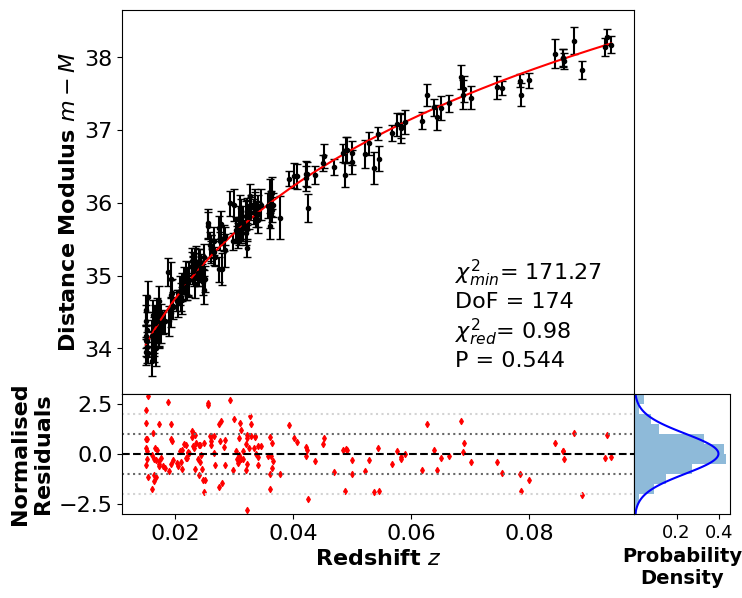

optimised parameter[0] = 0.07073885656656098 +/- 0.00039705168416757523
0.07073885656656098
0.00039705168416757523


In [17]:
#chi squared fitting
low_redshift_indices = np.where(redshift<0.1)[0]

xval = redshift[low_redshift_indices]
yval = distance_modulus[low_redshift_indices]
yerr = dm_err[low_redshift_indices]

def model_funct(x, *vals):
    return 5*np.log10((1+x)*c*x/vals[0]) - 5

initial = np.array([75.0 * 10**3 / (3.086*10**22)]) # Initial guess for fit parameters

plt.rcParams.update({'font.size': 16})

parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial,
                                               xlabel = 'Redshift $z$', 
                                               ylabel = 'Distance Modulus $m - M$') #optimised parameters given in erg/s/Ang
H_0 = parameters[0][0] #* 10**-3 * 10**6
H_0_err = parameters[1][0] #* 10**-3 * 10**6

print(H_0)
print(H_0_err)

Calculate Ω_Λ,0 (k=0)

Automated method

k=-1
DoF = 578
Optimised parameters =  [0.70396391 0.2748801 ] 

Covariance matrix = 
 [[ 0.00067693 -0.00045629]
 [-0.00045629  0.00033113]]


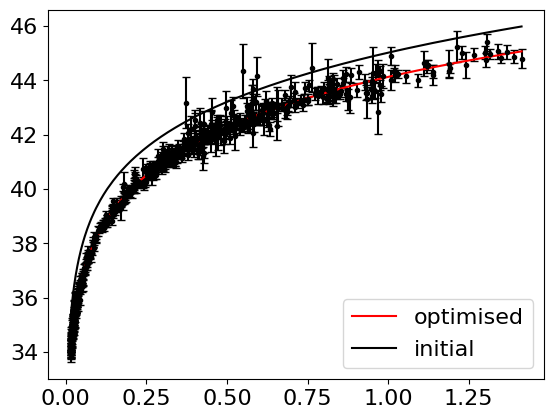

chi^2_min = 562.2319813160149
reduced chi^2 = 0.9727196908581572
$P(chi^2_min, DoF)$ = 0.6730664557859938


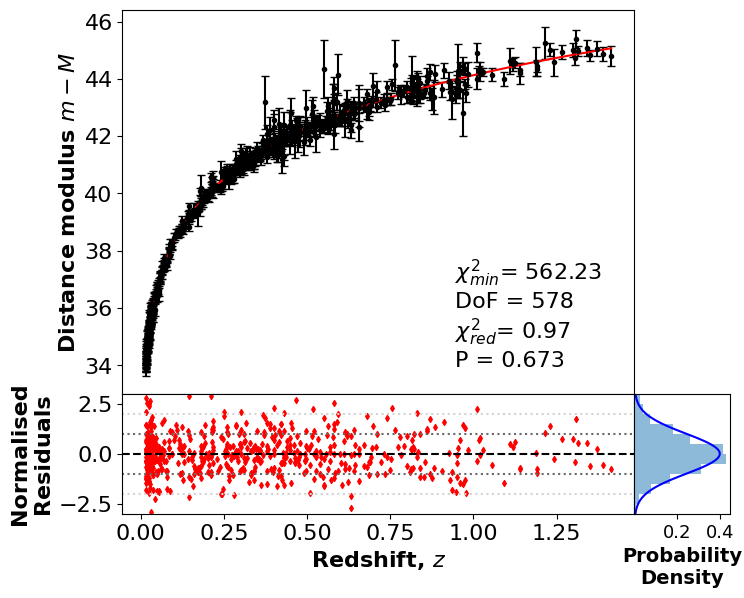

optimised parameter[0] = 0.7039639108051159 +/- 0.026017957839961695
optimised parameter[1] = 0.27488010494264115 +/- 0.01819686664718831
k=0
DoF = 579
Optimised parameters =  [0.75222665] 

Covariance matrix = 
 [[0.00016014]]


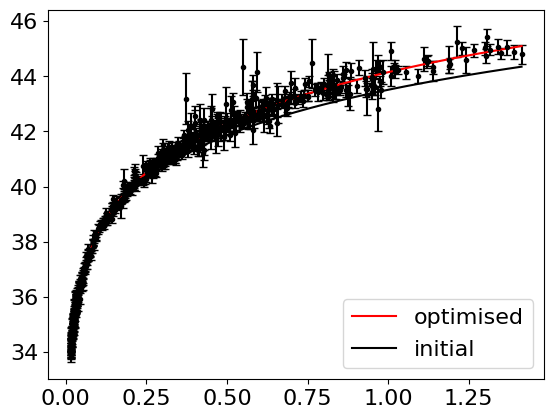

chi^2_min = 566.8753325408427
reduced chi^2 = 0.9790592962708855
$P(chi^2_min, DoF)$ = 0.6327669773443992


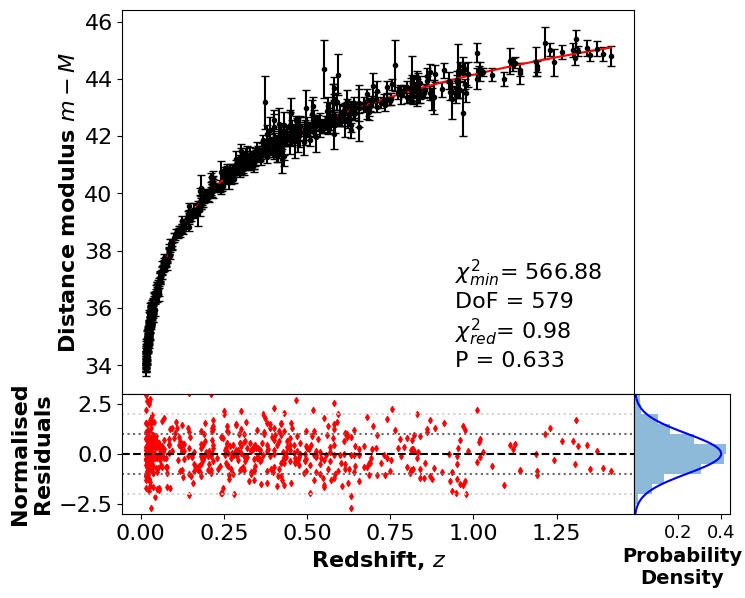

optimised parameter[0] = 0.75222664942708 +/- 0.012654735526790918
k=1
DoF = 578


C:\Users\bradl\AppData\Local\Temp\ipykernel_15924\1537893955.py:24: RuntimeWarning: invalid value encountered in scalar power
  R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5


Optimised parameters =  [0.77251423 0.22748588] 

Covariance matrix = 
 [[ 0.00063089 -0.00041629]
 [-0.00041629  0.00029765]]


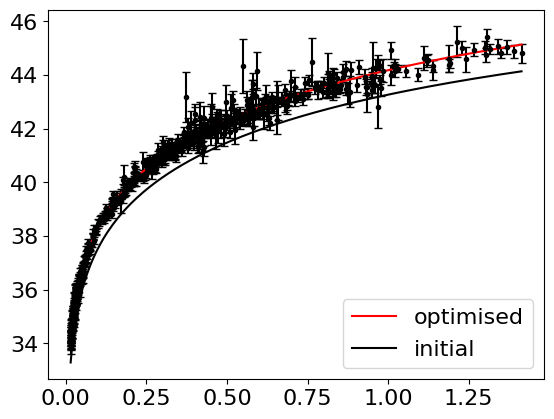

chi^2_min = 569.5484133900143
reduced chi^2 = 0.9853778778373949
$P(chi^2_min, DoF)$ = 0.5910180737916265


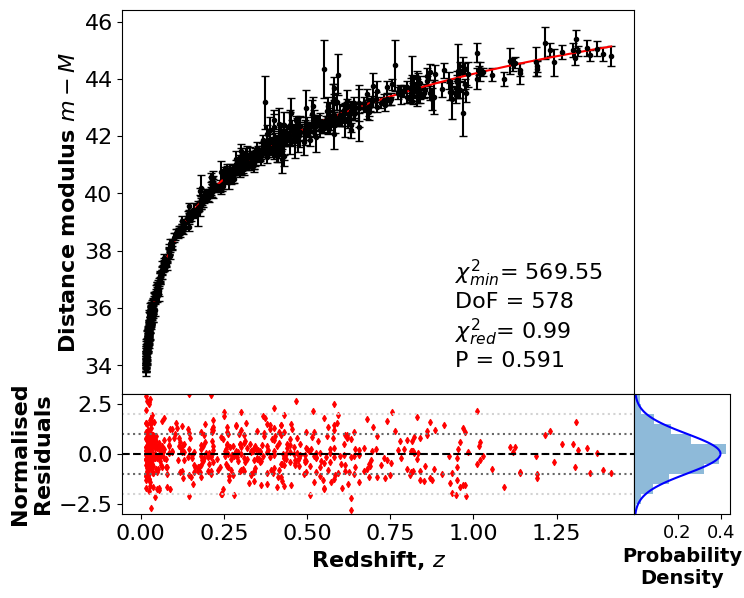

optimised parameter[0] = 0.7725142278312213 +/- 0.025117588437184802
optimised parameter[1] = 0.22748587616076016 +/- 0.017252487607222634
omega_TOT = 1.042370180036389 +/- 1.042370180036389


In [22]:
#chi squared fitting

xval = redshift
yval = distance_modulus
yerr = dm_err

plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

def model_funct(xs, *vals):
    try:
        if k==0:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(H_0, k, vals[0], 1-vals[0]))[0]) for x in xs.tolist()]
        else:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(H_0, k, vals[0], vals[1]))[0]) for x in xs.tolist()]
    except:
        if k==0:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(H_0, k, vals[0], 1-vals[0]))[0])
        else:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(H_0, k, vals[0], vals[1]))[0])

    if k == 0:
        return 5*np.log10((1+xs)*r_c)-5
    elif k == 1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sin(np.array(r_c)/R_0))-5
    elif k == -1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sinh(np.array(r_c)/R_0))-5

initials = [np.array([0.02, 0.3]), np.array([0.05]), np.array([1.5, 0.51])] # Initial guess for fit parameters
ks = [-1, 0, 1]

for i in range(0, len(ks)):
    k = ks[i]
    print(f'k={k}') 
    initial = initials[i]
    parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$') #optimised parameters given in erg/s/Ang
    if k == 1:
        print('omega_TOT = {} +/- {}'.format(np.sum(parameters), np.sum(parameters)))


Brute force method

In [ ]:
def find_parameters():
    no_of_trials = 100
    omega_lambda0s = np.linspace(-2, 2, no_of_trials)
    omega_M0s = np.linspace(-2, 2, no_of_trials)
    chi_squared = []
